<a href="https://colab.research.google.com/github/19pA1A05A0/AIML/blob/master/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

### Generating data 'X' ranges between -10 to 10 
### 'Y' is a linear combination of parameters as Y = ax+b+gaussian(0,epsilon)

In [0]:
Number_of_points = 1000
X_data = np.linspace(-10,10,Number_of_points)
W0_true = 11
W1_true = 4.5
Y_data = W1_true*X_data + W0_true + np.random.normal(0,0.5,Number_of_points)

### Split the data into training and testing set

In [0]:
Number_of_training = int(Number_of_points*0.8)
Number_of_testing = int(Number_of_points*0.2)
index = np.random.permutation(Number_of_points) #A random permutation of 1..N is generated

In [0]:
X_train = X_data[index[:Number_of_training]] 
Y_train = Y_data[index[:Number_of_training]]

In [0]:
X_test = X_data[index[Number_of_training:]]
Y_test = Y_data[index[Number_of_training:]]

### Plot the data points

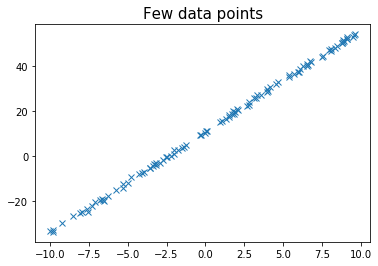

In [24]:
import matplotlib.pyplot as plt
def plot(x,y,title):
    fig,(ax1) = plt.subplots(1)
    if title!='Loss':
        ax1.plot(x,y,'x')
    else:
        ax1.plot(x,y)
        
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    
def plot_curve(x,y,W0,W1,title):
    fig,(ax1) = plt.subplots(1)
    #ax1.plot(x,y,'x')
    ax1.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'medium'})
    y = W0 + W1*x
    #ax1.plot(x,y,'o')
    ax1.plot([X_data[0],X_data[-1]],[W0_true+W1_true*X_data[0],W0_true+W1_true*X_data[-1]],color = 'blue')
    ax1.plot([X_data[0],X_data[-1]],[W0+W1*X_data[0],W0+W1*X_data[-1]],color = 'red')

    
plot(X_train[0:100],Y_train[0:100],'Few data points')

### Fitting a 1st order polynomial  of type y = W0 + W1*x. 
We want to learn the parameters W0 and W1. Lets initialize W0 and W1 with random values

In [0]:

def compute_loss(x,y,W0,W1):
    return np.sum(np.power(W0+W1*x - y,2))/(2.0*Number_of_training)
    

### Learning the parameters of the model for some 'N' epochs, by minimizing squared-difference error
$L(W) = \frac{1}{2}\Sigma_{n=1}^{N}(W^Tx_i - y_i)^2$                                                            

In [0]:
Epochs = 1000
learning_rate = 0.001
W0 = np.random.normal(0,0.2,1)
W1 = np.random.normal(0,0.2,1)
Loss = []
for epoch in range(Epochs):
    dW0 = 0;dW1 = 0
    for n in range(Number_of_training):
        dW0 = dW0 + (W0 + W1*X_train[n] - Y_train[n])*1
        dW1 = dW1 + (W0 + W1*X_train[n] - Y_train[n])*X_train[n]
    W0 = W0 - learning_rate*dW0/Number_of_training
    W1 = W1 - learning_rate*dW1/Number_of_training
    Loss.append(compute_loss(X_train,Y_train,W0,W1))
    if epoch%50==0:        
        plot_curve(X_train,Y_train,W0,W1,'Training')
        print("Epoch : "+str(epoch)+"\\"+str(Epochs) + " Train loss: "+str(compute_loss(X_train,Y_train,W0,W1)))
            #plot_curve(X_train,Y_train,W,'Training')


plot(range(len(Loss)),Loss,'Loss')
    
        
    
        


In [0]:
import pandas as pd

In [0]:
toyota=pd.read_csv("https://raw.githubusercontent.com/bhargav23/Dataset/master/Toyota.csv",index_col=0,na_values=['??','???','????'])

In [50]:
toyota.fillna(0)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,0.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.0,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,0.0,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,0.0,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,0.0,0,86.0,1.0,0,1300,3,1015


In [0]:
X_data=np.array(toyota['Age'])

In [0]:
Y_data=toyota['Price']

In [53]:
X_data.shape

(1436,)

In [0]:
index=np.random.permutation(nop)

In [0]:
train_num=int(nop*0.8)

In [0]:
X_train=X_data[index[:train_num]]
Y_train=Y_data[index[:train_num]]

In [0]:
X_test=X_data[index[train_num:]]
Y_test=Y_data[index[train_num:]]

In [58]:
X_train.reshape(-1,1)

array([[46.],
       [33.],
       [49.],
       ...,
       [54.],
       [20.],
       [nan]])

In [59]:
X_train.shape

(1148,)